In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn import datasets

In [2]:
wine=datasets.load_wine()
x=wine.data
y=wine.target

In [5]:
print("Features : ")
print(wine.feature_names)
print("Data : ")
print(x)

Features : 
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Data : 
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [4]:
print('Classes:', wine.target_names)
print('Target values:')
print(y)

Classes: ['class_0' 'class_1' 'class_2']
Target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [7]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

C:\Users\Prajwal\AppData\Local\Temp\ipykernel_2216\817146339.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=100, marker='x')


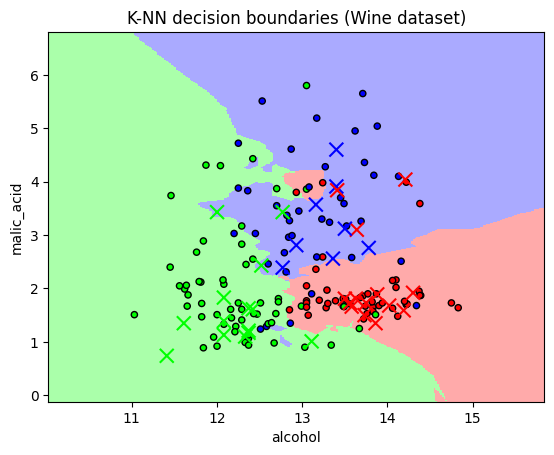

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Using the first two features for 2D visualization
x_train_2d = x_train[:, :2]
x_test_2d = x_test[:, :2]

classifier_2d = KNeighborsClassifier(n_neighbors=5)
classifier_2d.fit(x_train_2d, y_train)

# Create meshgrid
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

# Plot training points
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=20)
plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=100, marker='x')

plt.title("K-NN decision boundaries (Wine dataset)")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()


In [11]:
y_pred=classifier.predict(x_test)

Confusion Matrix : 
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


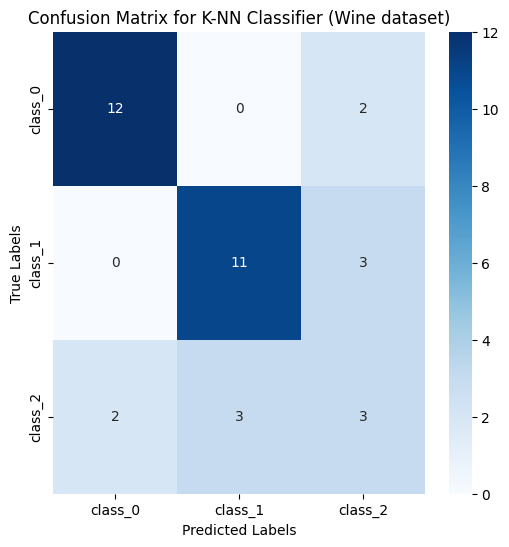

In [12]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Confusion Matrix for K-NN Classifier (Wine dataset)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [13]:
print("Accuracy Metrics ")
print(classification_report(y_test,y_pred))

Accuracy Metrics 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [14]:
f1=f1_score(y_test,y_pred,average=None)
print("F1 score for each class : ",f1)

F1 score for each class :  [0.85714286 0.78571429 0.375     ]


In [15]:
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print('Macro Average F1 Score:', f1_macro)
print('Weighted Average F1 Score:', f1_weighted)

Macro Average F1 Score: 0.6726190476190476
Weighted Average F1 Score: 0.7222222222222222
